In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import IPython.display as ipd

## Generate stimulus signal

In [2]:
# Parameters
fs = 3e6//64  # Sampling frequency
f0 = 1e3  # Frequency of the cosine wave
N = 2**14  # Number of samples

# Generate the angular frequency array
w = 2 * np.pi * f0 / fs * np.arange(0, N)

# Generate the stimulus
stim = np.cos(w) + 1

# Subtract the mean 
stim_normalized = stim - np.mean(stim)
# Normalizing the stimulus to be in the range of -1 to 1 for WAV format
stim_normalized = stim / np.max(np.abs(stim))

# Convert the stimulus to 16-bit integers, as required by the WAV format
stim_int16 = np.int16(stim_normalized * np.iinfo(np.int16).max)

# File path for the WAV file
wav_file_path = './stim.wav'

# Writing the WAV file
write(wav_file_path, int(fs), stim_int16)

# Displaying the path to the WAV file
wav_file_path

'./stim.wav'

In [3]:
ipd.Audio(wav_file_path)

## Compare the original stimulus and similuated stimulus

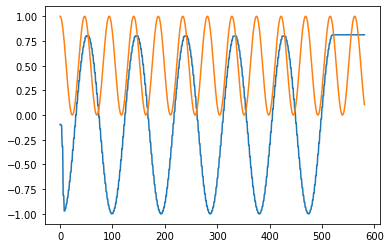

In [29]:
with open('../output_mic_data.log', 'r') as fd:
    content = fd.read()

pdm_data = []

for x in content.split(','):
    pdm_data.append(int(x))
pdm_data = np.array(pdm_data)

pdm_data = pdm_data - np.mean(pdm_data)
pdm_data = pdm_data / np.max(np.abs(pdm_data))

plt.plot(pdm_data)
plt.plot(stim_normalized[:len(pdm_data)])


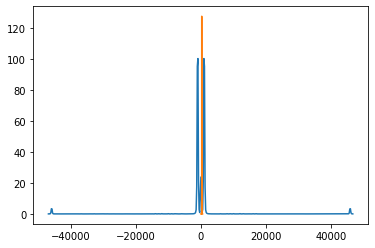

In [30]:
N = 512
fs = 3e6/64

window = np.hanning(N)

fft_data = np.fft.fftshift(np.abs(np.fft.fft(pdm_data[0:N]*window)))
x_data = np.arange(-N/2, N/2)*fs*2/N
plt.plot(x_data, fft_data)

fft_stim_data = np.fft.fftshift(np.abs(np.fft.fft(stim_normalized[0:N]*window)))
plt.plot(fft_stim_data)

plt.show()

## PDM to PCM (FPGA)

In [7]:
import pyshark

In [ ]:
# PCAP_FILE_PATH = r'C:\Users\inba2\Desktop\DDFPGA\TermProject\ddfpga-project\python\pcap_final_demo.pcapng'
# DEST_SRC_MAC = b'<|?\x1a\xea\x02\x00\x18>\x01\xebn'


# sample_bytes = 4
# sample_rate = 3e6//64

# with open("final_demo_bin.bin", "wb") as f:
#     cap = pyshark.FileCapture(
#         PCAP_FILE_PATH, only_summaries=False, use_json=True, include_raw=True)

#     for packet in cap:
#         try:
#             # Accessing the binary data of the packet
#             binary_data = bytes(packet.get_raw_packet())
#             print("Parsing packet of length: ", len(binary_data)-14)
#             if binary_data[0:12] == DEST_SRC_MAC:
#                 # Trim off header
#                 f.write(binary_data[14:])
#             else:
#                 print(
#                     f"Wrong packet received with mac {binary_data[0:12].hex()}")
#         except Exception as e:
#             # In case of any error
#             print(f"Error extracting data: {e}")

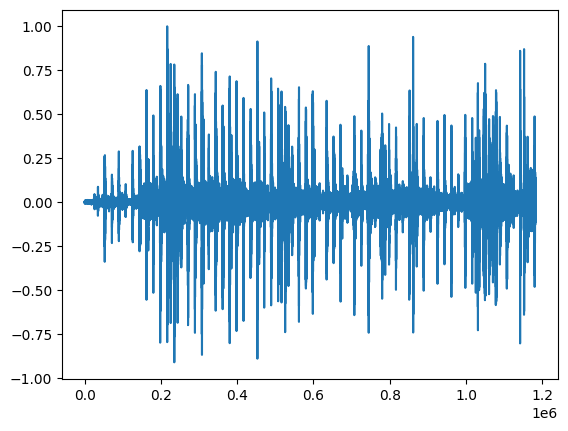

In [9]:
with open("../bin_final_demo.bin", "rb") as f:
    mic_data = np.fromfile(f, ">i4")

mic_data = mic_data - np.mean(mic_data)
mic_data = mic_data / np.max(np.abs(mic_data))
plt.plot(mic_data)

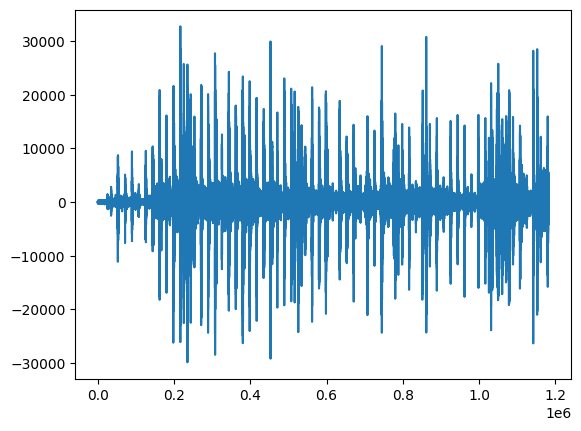

In [10]:
# Subtract the mean 
mic_data_normalized = mic_data - np.mean(mic_data)
# Normalizing the stimulus to be in the range of -1 to 1 for WAV format
mic_data_normalized = mic_data_normalized / np.max(np.abs(mic_data_normalized))

# Convert the stimulus to 16-bit integers, as required by the WAV format
mic_data_normalized_int16 = np.int16(mic_data_normalized * np.iinfo(np.int16).max)

plt.plot(mic_data_normalized_int16)

In [11]:
# File path for the WAV file
wav_file_path = './demo_test.wav'

fs = 2.4e6/64

# Writing the WAV file
write(wav_file_path, int(fs), mic_data_normalized_int16)

# Displaying the path to the WAV file
print("File saved to: ", wav_file_path)

ipd.Audio(wav_file_path)

File saved to:  ./demo_test.wav


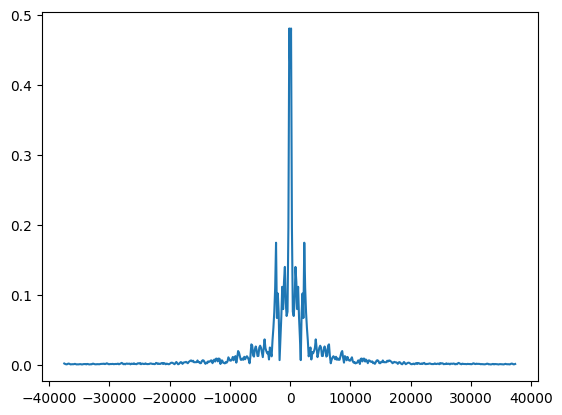

In [12]:
N = 512
fs = 2.4e6/64

window = np.hanning(N)

fft_data = np.fft.fftshift(np.abs(np.fft.fft(mic_data[0:N]*window)))
x_data = np.arange(-N/2, N/2)*fs*2/N
plt.plot(x_data, fft_data)

plt.show()

In [7]:
# File path for the WAV file
wav_file_path = './mic_audio.wav'
fs = 2.4e6//64

# Writing the WAV file
write(wav_file_path, int(fs), mic_data_normalized_int16)

# Displaying the path to the WAV file
print("File saved to: ", wav_file_path)

ipd.Audio(wav_file_path)

File saved to:  ./mic_audio.wav
